In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [2]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [3]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [4]:
ordinal.head(2)

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0,3,3,3,3,3,3,8,4,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,3.0,5.0,6.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,4.0,856,126000,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,68.516053,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,1,4,3,4,3,3,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,0.0,4.0,3.0,1049,139500,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,42.000000,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0


In [5]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [6]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [7]:
def get_models_2():
    models = dict()
    models['gradient boost'] = GradientBoostingRegressor()
    models['Xtreme GB'] = XGBRegressor()
    models['CatBoost'] = CatBoostRegressor(verbose=False)
    return models

In [8]:
models2 = get_models_2()

In [9]:
#Create List of Dictionaries to evalute models

dfs2 = list()

for name, model in models2.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs2.append(df)

In [10]:
cb = dfs2[2][['test_score']]
cb = cb.rename(columns = {'test_score':'CatBoost'})
cb

,CatBoost
0,0.926457
1,0.902353
2,0.935233
3,0.929956
4,0.948118
5,0.936021
6,0.944510
7,0.922645
8,0.945339
9,0.880212


In [11]:
ordinal2 = pd.read_csv('BaseOrdinal minus DeCock Outliers.csv')
ordinal2.shape

(2578, 81)

In [12]:
ordinal2 = ordinal2.drop(['Unnamed: 0'], axis=1)
ordinal2.shape

(2578, 80)

In [13]:
X2 = ordinal2.drop(['SalePrice'], axis=1)
y2 = ordinal2.SalePrice

In [14]:
#Create List of Dictionaries to evalute models

dfs3 = list()

for name, model in models2.items():
    
    # evaluate the model
    df = evaluate_model(model, X2, y2)
    dfs3.append(df)

In [15]:
cb2 = dfs3[2][['test_score']]
cb2 = cb2.rename(columns = {'test_score':'CatBoost No DeCock Outlier'})
cb2

,CatBoost No DeCock Outlier
0,0.931030
1,0.941082
2,0.948791
3,0.920060
4,0.948075
5,0.937337
6,0.944853
7,0.933087
8,0.943065
9,0.941059


In [16]:
combo = pd.concat([cb, cb2], axis=1)
combo

,CatBoost,CatBoost No DeCock Outlier
0,0.926457,0.931030
1,0.902353,0.941082
2,0.935233,0.948791
3,0.929956,0.920060
4,0.948118,0.948075
5,0.936021,0.937337
6,0.944510,0.944853
7,0.922645,0.933087
8,0.945339,0.943065
9,0.880212,0.941059


In [17]:
combo.describe()

,CatBoost,CatBoost No DeCock Outlier
count,15.000000,15.000000
mean,0.925691,0.938089
std,0.023365,0.008409
min,0.871441,0.920060
25%,0.923539,0.932613
50%,0.934365,0.939516
75%,0.942142,0.943959
max,0.948118,0.948791


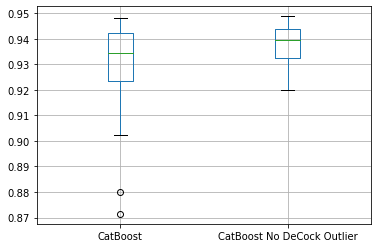

In [19]:
combo.boxplot();